In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import WMAP9 as cosmo

In [4]:
# Mstar -> SFR equation: Schreiber et al. 2015
# SFR -> t_age,tau equation: Noll et al. 2009 
# tau from 20-5000 Myr

In [19]:
def get_tau(sfr, Mstar, redshift):
    age_universe = cosmo.age(redshift).value*1e9
    tau = np.arange(10000,1000000000,10000)[::-1]
    t_ages = []
    for j in range(len(Mstar)):
        tage = age_universe
        i = -1
        while (tage >= age_universe):
            i += 1
            tage = tau[i]*(np.log(Mstar[j]/(tau[i]*sfr[j]) + 1.0))
        t_ages.append(tage)
    return (tau[i],np.array(t_ages))

def get_MS_sfr(Mstar, z):
    r = np.log10(1 + z)
    # m0 = np.random.normal(loc=0.5,scale=0.07)
    # a0 = np.random.normal(loc=1.5,scale=0.15)
    # a1 = np.random.normal(loc=0.3,scale=0.08)
    # m1 = np.random.normal(loc=.36,scale=0.30)
    # a2 = np.random.normal(loc=2.5,scale=0.60)
    m0 = 0.5
    a0 = 1.5
    a1 = 0.3
    m1 = .36
    a2 = 2.5
    m_scaled = np.log10(m_star/10**9)
    sfr = [(10**(m - m0 + a0*r - a1*(max(0,m-m1-a2*r))**2)) for m in m_scaled]
    return sfr

def get_sfr(Mstar, tau, t_age):
    sfr = Mstar/(tau*(np.exp(t_age/tau)-1))
    return sfr

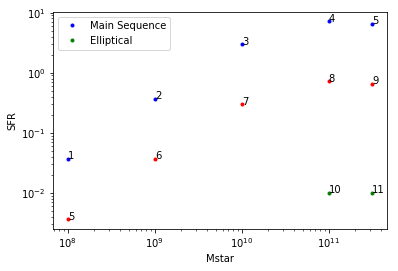

In [20]:
z = .10
m_star = np.logspace(start=8,stop=11,num=4,base=10)
m_star = np.append(m_star,10**11.5)
sfr = get_MS_sfr(m_star,z)
tau,t_age = get_tau(sfr,m_star,z)

tau_lower_sfr = tau*10.0
t_age_lower_sfr = t_age*10.0
sfr_lower = get_sfr(m_star,tau_lower_sfr,t_age_lower_sfr)

sfr_elliptical = np.ones(2)*1e-2
tau_elliptical_sfr, t_age_elliptical_sfr = get_tau(sfr_elliptical,m_star[-2:],z)

fig, ax = plt.subplots()
ax.loglog(m_star,sfr,'b.',label="Main Sequence")
ax.loglog(m_star,sfr_lower,'r.')
ax.loglog(m_star[-2:],sfr_elliptical,'g.',label="Elliptical")
plt.legend()
plt.ylabel("SFR")
plt.xlabel("Mstar")

for i in range(len(sfr)):
    ax.annotate(i+1, (m_star[i], sfr[i]))
    ax.annotate(i+len(sfr),(m_star[i],sfr_lower[i]))

for j in range(len(sfr_elliptical)):
    ax.annotate(i+len(sfr)+1,(m_star[-2:][j],sfr_elliptical[j]))
    i += 1

plt.show()